# Prediksi Tingkat Curah Hujan di Kabupaten Deli Serdang Provinsi Sumatera Utara

Data yang digunakan oleh kelompok 4 adalah data harian curah hujan Kabupaten Deli serdang sejak 1 Oktober 2021 sampai dengan 01 November 2021. Keterangan Variabel yang digunakan adalah sebagai berikut:

- Tn      : Temperatur minimum	 (°C)
- Tx      : Temperatur maksimum (°C)
- Tavg    : Temperatur rata-rata (°C)
- RH_avg  : Kelembapan rata-rata (%)
- RR      : Curah hujan (mm)
- ss      : Lamanya penyinaran matahari (jam)
- ff_x    : Kecepatan angin maksimum (m/s)
- ddd_x   : Arah angin saat kecepatan maksimum (°)
- ff_avg  : Kecepatan angin rata-rata (m/s)
- ddd_car : Arah angin terbanyak (°)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Persiapan Data

In [2]:
df = pd.read_csv("klp 4.csv")
df.head(10)

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-10-2021,25.4,31.4,27.8,76,7.6,7.3,6,270,2,SW
1,02-10-2021,24.2,33.2,27.8,77,NaN,0.4,4,45,1,C
2,03-10-2021,25.6,33.2,28.5,82,NaN,4.4,5,45,2,NE
3,04-10-2021,23.8,33.6,27.6,78,NaN,9.2,6,45,2,NE
4,05-10-2021,25.0,31.2,27.4,87,NaN,8.6,4,45,2,W
5,06-10-2021,25.0,31.6,27.5,79,NaN,0.7,5,270,2,C
6,07-10-2021,25.0,34.0,27.6,82,NaN,1.0,4,135,2,C
7,08-10-2021,24.6,35.2,28.3,82,8.2,5.0,4,45,2,NE
8,09-10-2021,24.8,32.6,28.0,84,NaN,5.0,4,45,2,NE
9,10-10-2021,25.4,32.8,28.3,85,4.2,8.5,4,45,2,NE


In [3]:
df.shape

(32, 11)

In [4]:
df.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
count,30.000000,30.000000,32.000000,32.000000,17.000000,32.000000,32.000000,32.000000,32.000000
mean,24.566667,32.366667,27.512500,82.718750,1587.100000,5.440625,4.406250,93.906250,1.843750
std,0.670735,1.516878,0.792607,3.828875,3483.789128,3.184525,1.103057,91.093132,0.627816
min,23.200000,30.000000,25.800000,74.000000,0.000000,0.000000,3.000000,45.000000,0.000000
25%,24.000000,31.200000,27.000000,80.750000,0.700000,2.275000,4.000000,45.000000,2.000000
50%,24.700000,32.100000,27.600000,83.000000,8.200000,6.000000,4.000000,45.000000,2.000000
75%,25.000000,33.500000,28.200000,85.250000,86.900000,8.300000,5.000000,101.250000,2.000000
max,25.600000,35.200000,29.000000,89.000000,8888.000000,9.700000,7.000000,360.000000,3.000000


In [5]:
to_drop = ['RR','ddd_x']

In [6]:
df.drop(to_drop, inplace=True, axis=1)

In [7]:
df.head(10)

,Tanggal,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg,ddd_car
0,01-10-2021,25.4,31.4,27.8,76,7.3,6,2,SW
1,02-10-2021,24.2,33.2,27.8,77,0.4,4,1,C
2,03-10-2021,25.6,33.2,28.5,82,4.4,5,2,NE
3,04-10-2021,23.8,33.6,27.6,78,9.2,6,2,NE
4,05-10-2021,25.0,31.2,27.4,87,8.6,4,2,W
5,06-10-2021,25.0,31.6,27.5,79,0.7,5,2,C
6,07-10-2021,25.0,34.0,27.6,82,1.0,4,2,C
7,08-10-2021,24.6,35.2,28.3,82,5.0,4,2,NE
8,09-10-2021,24.8,32.6,28.0,84,5.0,4,2,NE
9,10-10-2021,25.4,32.8,28.3,85,8.5,4,2,NE


In [8]:
df.isnull().sum()

Tanggal    0
Tn         2
Tx         2
Tavg       0
RH_avg     0
ss         0
ff_x       0
ff_avg     0
ddd_car    0
dtype: int64

# Tugas Akhir 3: Cleansing dan Eksplorasi Data

# Menghilangkan Missing Data

In [9]:
print('Nilai NaN pada kolom Tn berjumlah :', df.isnull().sum().Tn)
print()
print('Nilai NaN pada kolom Tx berjumlah :', df.isnull().sum().Tx)

Nilai NaN pada kolom Tn berjumlah : 2

Nilai NaN pada kolom Tx berjumlah : 2


In [10]:
index_nan = np.where(df.isnull().Tn)
index_nan = np.where(df.isnull().Tx)
index_nan

(array([14, 17], dtype=int64),)

In [11]:
# Cetak ukuran awal dataframe
print("Ukuran awal df: %d baris, %d kolom."%df.shape)

# Drop baris NaN
df = df.dropna()
print("Ukuran df setelah dibuang baris yang memiliki missing value: %d baris, %d kolom."%df.shape)

Ukuran awal df: 32 baris, 9 kolom.
Ukuran df setelah dibuang baris yang memiliki missing value: 29 baris, 9 kolom.


# Mendeteksi Outlier

Kolom Tn

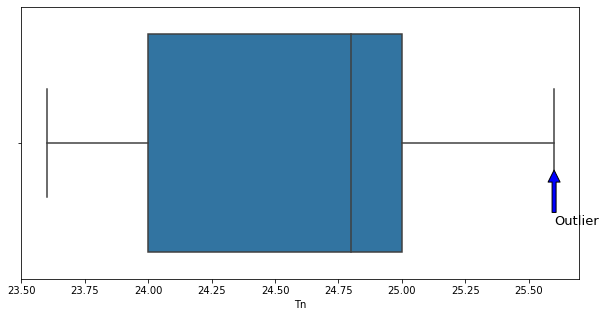

In [12]:
plt.figure(figsize = (10, 5))
sns.boxplot(df['Tn'])
plt.annotate('Outlier', (df['Tn'].describe()['max'],0.1), xytext = (df['Tn'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['Tn'].describe()['75%'] - df['Tn'].describe()['25%']

In [13]:
def detect_outliers(df, Tn):
    Q1 = df["Tn"].describe()['25%']
    Q3 = df["Tn"].describe()['75%']
    IQR = Q3-Q1
    return df[(df["Tn"] < Q1-1.5*IQR) | (df["Tn"] > Q3+1.5*IQR)]

In [14]:
detect_outliers(df,'Tn')

,Tanggal,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg,ddd_car


Kolom Tx

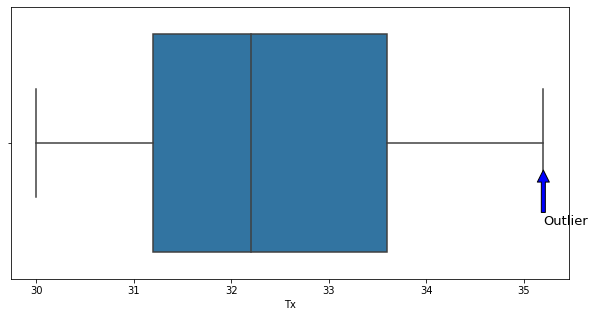

In [15]:
plt.figure(figsize = (10, 5))
sns.boxplot(df['Tx'])
plt.annotate('Outlier', (df['Tx'].describe()['max'],0.1), xytext = (df['Tx'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['Tx'].describe()['75%'] - df['Tx'].describe()['25%']

In [16]:
def detect_outliers(df, Tx):
    Q1 = df["Tx"].describe()['25%']
    Q3 = df["Tx"].describe()['75%']
    IQR = Q3-Q1
    return df[(df["Tx"] < Q1-1.5*IQR) | (df["Tx"] > Q3+1.5*IQR)]

In [17]:
detect_outliers(df,'Tx')

,Tanggal,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg,ddd_car


Kolom Tavg

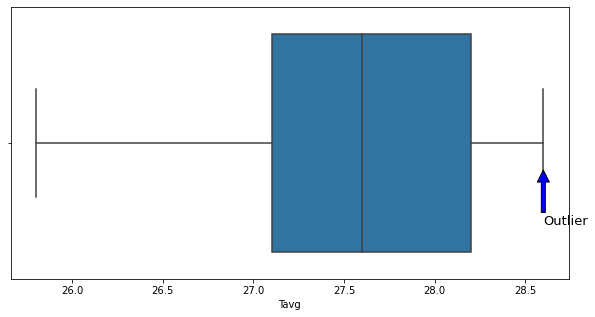

In [18]:
plt.figure(figsize = (10, 5))
sns.boxplot(df['Tavg'])
plt.annotate('Outlier', (df['Tavg'].describe()['max'],0.1), xytext = (df['Tavg'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['Tavg'].describe()['75%'] - df['Tavg'].describe()['25%']

In [19]:
def detect_outliers(df, Tavg):
    Q1 = df["Tavg"].describe()['25%']
    Q3 = df["Tavg"].describe()['75%']
    IQR = Q3-Q1
    return df[(df["Tavg"] < Q1-1.5*IQR) | (df["Tavg"] > Q3+1.5*IQR)]

In [20]:
detect_outliers(df,'Tavg')

,Tanggal,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg,ddd_car


Kolom RH_avg

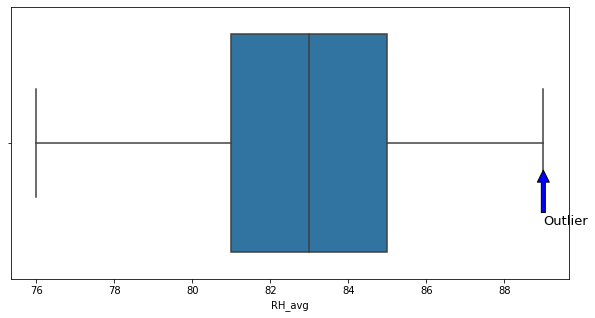

In [21]:
plt.figure(figsize = (10, 5))
sns.boxplot(df['RH_avg'])
plt.annotate('Outlier', (df['RH_avg'].describe()['max'],0.1), xytext = (df['RH_avg'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['RH_avg'].describe()['75%'] - df['RH_avg'].describe()['25%']

In [22]:
def detect_outliers(df, RH_avg):
    Q1 = df["RH_avg"].describe()['25%']
    Q3 = df["RH_avg"].describe()['75%']
    IQR = Q3-Q1
    return df[(df["RH_avg"] < Q1-1.5*IQR) | (df["RH_avg"] > Q3+1.5*IQR)]

In [23]:
detect_outliers(df,'RH_avg')

,Tanggal,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg,ddd_car


Kolom ss

In [24]:
def detect_outliers(df, ss):
    Q1 = df["ss"].describe()['25%']
    Q3 = df["ss"].describe()['75%']
    IQR = Q3-Q1
    return df[(df["ss"] < Q1-1.5*IQR) | (df["ss"] > Q3+1.5*IQR)]

In [25]:
detect_outliers(df,'ss')

,Tanggal,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg,ddd_car


Kolom ff_x

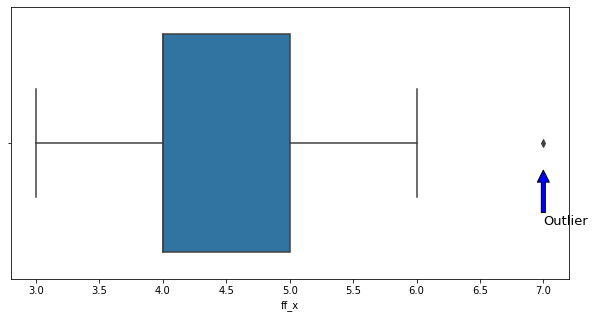

In [26]:
plt.figure(figsize = (10, 5))
sns.boxplot(df['ff_x'])
plt.annotate('Outlier', (df['ff_x'].describe()['max'],0.1), xytext = (df['ff_x'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['ff_x'].describe()['75%'] - df['ff_x'].describe()['25%']

In [27]:
def detect_outliers(df, ff_x):
    Q1 = df["ff_x"].describe()['25%']
    Q3 = df["ff_x"].describe()['75%']
    IQR = Q3-Q1
    return df[(df["ff_x"] < Q1-1.5*IQR) | (df["ff_x"] > Q3+1.5*IQR)]

In [28]:
detect_outliers(df, 'ff_x')

,Tanggal,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg,ddd_car
12,13-10-2021,25.4,34.2,28.6,80,8.0,7,3,NE


In [29]:
df = df.drop((df[df["ff_x"]>6]).index, axis=0)

In [30]:
detect_outliers(df, 'ff_x')

,Tanggal,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg,ddd_car


Kolom ff_avg

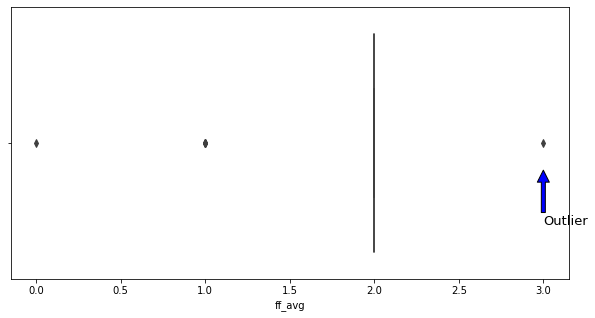

In [31]:
plt.figure(figsize = (10, 5))
sns.boxplot(df['ff_avg'])
plt.annotate('Outlier', (df['ff_avg'].describe()['max'],0.1), xytext = (df['ff_avg'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['ff_avg'].describe()['75%'] - df['ff_avg'].describe()['25%']

In [32]:
def detect_outliers(df, ff_avg):
    Q1 = df["ff_avg"].describe()['25%']
    Q3 = df["ff_avg"].describe()['75%']
    IQR = Q3-Q1
    return df[(df["ff_avg"] < Q1-1.5*IQR) | (df["ff_avg"] > Q3+1.5*IQR)]

In [33]:
detect_outliers(df, 'ff_avg')

,Tanggal,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg,ddd_car
1,02-10-2021,24.2,33.2,27.8,77,0.4,4,1,C
16,17-10-2021,25.6,31.0,27.0,85,7.5,4,1,C
19,20-10-2021,24.0,30.2,26.3,88,4.3,3,1,C
20,21-10-2021,24.0,30.0,26.3,88,2.2,3,1,NE
24,25-10-2021,24.2,31.2,27.0,85,2.2,4,3,NE
25,26-10-2021,23.6,32.0,27.1,84,6.7,3,1,NE
26,27-10-2021,25.0,31.0,27.1,86,9.1,3,0,C


In [34]:
df = df.drop((df[df["ff_avg"]>2]).index, axis=0)

In [35]:
df = df.drop((df[df["ff_avg"]<2]).index, axis=0)

In [36]:
print("Ukuran df setelah dibuang baris yang memiliki outlier: %d baris, %d kolom."%df.shape)

Ukuran df setelah dibuang baris yang memiliki outlier: 21 baris, 9 kolom.


# Memeriksa Kembali Data yang Siap digunakan

In [37]:
df.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg,ddd_car
0,01-10-2021,25.4,31.4,27.8,76,7.3,6,2,SW
2,03-10-2021,25.6,33.2,28.5,82,4.4,5,2,NE
3,04-10-2021,23.8,33.6,27.6,78,9.2,6,2,NE
4,05-10-2021,25.0,31.2,27.4,87,8.6,4,2,W
5,06-10-2021,25.0,31.6,27.5,79,0.7,5,2,C


In [38]:
df.describe()

,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,24.657143,32.723810,27.657143,82.428571,5.909524,4.523810,2.0
std,0.600476,1.459419,0.721506,3.515273,3.014947,0.872872,0.0
min,23.600000,30.200000,25.800000,76.000000,0.000000,3.000000,2.0
25%,24.000000,31.600000,27.400000,81.000000,4.400000,4.000000,2.0
50%,25.000000,32.600000,27.700000,82.000000,6.200000,4.000000,2.0
75%,25.000000,34.000000,28.200000,84.000000,8.500000,5.000000,2.0
max,25.600000,35.200000,28.600000,89.000000,9.700000,6.000000,2.0


In [39]:
df.shape

(21, 9)

Memeriksa tipe data dari masing-masing kolom dan melihat berapa banyak nilai nol yang ada dalam data.

In [40]:
df.columns

Index(['Tanggal', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'ss', 'ff_x', 'ff_avg',
       'ddd_car'],
      dtype='object')

In [41]:
df.dtypes

Tanggal     object
Tn         float64
Tx         float64
Tavg       float64
RH_avg       int64
ss         float64
ff_x         int64
ff_avg       int64
ddd_car     object
dtype: object

In [42]:
#check NaNs
df.isnull().sum()

Tanggal    0
Tn         0
Tx         0
Tavg       0
RH_avg     0
ss         0
ff_x       0
ff_avg     0
ddd_car    0
dtype: int64

In [43]:
#show all objects
df.select_dtypes

<bound method DataFrame.select_dtypes of        Tanggal    Tn    Tx  Tavg  RH_avg   ss  ff_x  ff_avg ddd_car
0   01-10-2021  25.4  31.4  27.8      76  7.3     6       2      SW
2   03-10-2021  25.6  33.2  28.5      82  4.4     5       2      NE
3   04-10-2021  23.8  33.6  27.6      78  9.2     6       2      NE
4   05-10-2021  25.0  31.2  27.4      87  8.6     4       2      W 
5   06-10-2021  25.0  31.6  27.5      79  0.7     5       2      C 
6   07-10-2021  25.0  34.0  27.6      82  1.0     4       2      C 
7   08-10-2021  24.6  35.2  28.3      82  5.0     4       2      NE
8   09-10-2021  24.8  32.6  28.0      84  5.0     4       2      NE
9   10-10-2021  25.4  32.8  28.3      85  8.5     4       2      NE
10  11-10-2021  24.0  35.2  28.2      76  6.6     5       2      C 
11  12-10-2021  25.0  34.4  28.4      81  8.3     6       2      C 
13  14-10-2021  25.0  34.6  28.6      81  9.2     4       2      E 
15  16-10-2021  25.0  34.0  28.2      80  9.7     6       2      C 
18  19-

In [44]:
df.select_dtypes(include=['object'])

,Tanggal,ddd_car
0,01-10-2021,SW
2,03-10-2021,NE
3,04-10-2021,NE
4,05-10-2021,W
5,06-10-2021,C
6,07-10-2021,C
7,08-10-2021,NE
8,09-10-2021,NE
9,10-10-2021,NE
10,11-10-2021,C


In [45]:
df.dtypes.value_counts()

float64    4
int64      3
object     2
dtype: int64

In [46]:
feature ='Tanggal'
df[feature].value_counts()

01-10-2021    1
14-10-2021    1
31-10-2021    1
30-10-2021    1
29-10-2021    1
28-10-2021    1
24-10-2021    1
23-10-2021    1
19-10-2021    1
16-10-2021    1
12-10-2021    1
03-10-2021    1
11-10-2021    1
10-10-2021    1
09-10-2021    1
08-10-2021    1
07-10-2021    1
06-10-2021    1
05-10-2021    1
04-10-2021    1
01-11-2021    1
Name: Tanggal, dtype: int64

In [47]:
df[feature].unique()

array(['01-10-2021', '03-10-2021', '04-10-2021', '05-10-2021',
       '06-10-2021', '07-10-2021', '08-10-2021', '09-10-2021',
       '10-10-2021', '11-10-2021', '12-10-2021', '14-10-2021',
       '16-10-2021', '19-10-2021', '23-10-2021', '24-10-2021',
       '28-10-2021', '29-10-2021', '30-10-2021', '31-10-2021',
       '01-11-2021'], dtype=object)

In [48]:
df.nunique()

Tanggal    21
Tn          9
Tx         17
Tavg       16
RH_avg     13
ss         18
ff_x        4
ff_avg      1
ddd_car     6
dtype: int64

In [49]:
df_deep=df.copy(deep=True)
df_shallow=df.copy(deep=False)

In [50]:
df['Tanggal'].is_unique

True

In [51]:
df = df.set_index('Tanggal')
df.head()

,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg,ddd_car
Tanggal,,,,,,,,
01-10-2021,25.4,31.4,27.8,76,7.3,6,2,SW
03-10-2021,25.6,33.2,28.5,82,4.4,5,2,NE
04-10-2021,23.8,33.6,27.6,78,9.2,6,2,NE
05-10-2021,25.0,31.2,27.4,87,8.6,4,2,W
06-10-2021,25.0,31.6,27.5,79,0.7,5,2,C


In [52]:
df.loc['01-10-2021']

Tn         25.4
Tx         31.4
Tavg       27.8
RH_avg       76
ss          7.3
ff_x          6
ff_avg        2
ddd_car      SW
Name: 01-10-2021, dtype: object

In [53]:
df.sort_values(by=['Tanggal'])

,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg,ddd_car
Tanggal,,,,,,,,
01-10-2021,25.4,31.4,27.8,76,7.3,6,2,SW
01-11-2021,24.0,31.6,27.1,84,2.3,4,2,NE
03-10-2021,25.6,33.2,28.5,82,4.4,5,2,NE
04-10-2021,23.8,33.6,27.6,78,9.2,6,2,NE
05-10-2021,25.0,31.2,27.4,87,8.6,4,2,W
06-10-2021,25.0,31.6,27.5,79,0.7,5,2,C
07-10-2021,25.0,34.0,27.6,82,1.0,4,2,C
08-10-2021,24.6,35.2,28.3,82,5.0,4,2,NE
09-10-2021,24.8,32.6,28.0,84,5.0,4,2,NE


In [54]:
df

,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg,ddd_car
Tanggal,,,,,,,,
01-10-2021,25.4,31.4,27.8,76,7.3,6,2,SW
03-10-2021,25.6,33.2,28.5,82,4.4,5,2,NE
04-10-2021,23.8,33.6,27.6,78,9.2,6,2,NE
05-10-2021,25.0,31.2,27.4,87,8.6,4,2,W
06-10-2021,25.0,31.6,27.5,79,0.7,5,2,C
07-10-2021,25.0,34.0,27.6,82,1.0,4,2,C
08-10-2021,24.6,35.2,28.3,82,5.0,4,2,NE
09-10-2021,24.8,32.6,28.0,84,5.0,4,2,NE
10-10-2021,25.4,32.8,28.3,85,8.5,4,2,NE


# Eksplorasi Data

Text(0.5, 1.0, 'General Statistics of Iris Dataset')

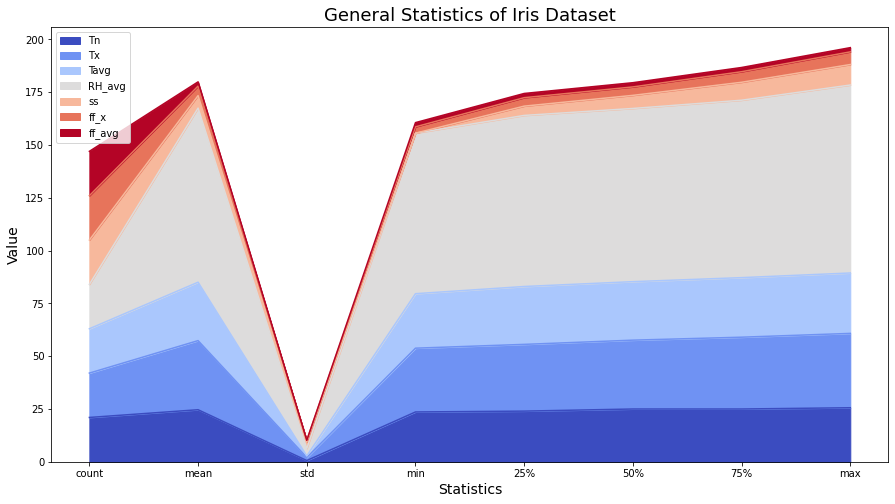

In [55]:
df.describe().plot(kind = "area", figsize = (15,8), colormap="coolwarm")
plt.xlabel('Statistics',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.title("General Statistics of Iris Dataset",fontsize=18)

Text(0.5, 1.0, 'Arah Angin Terbanyak')

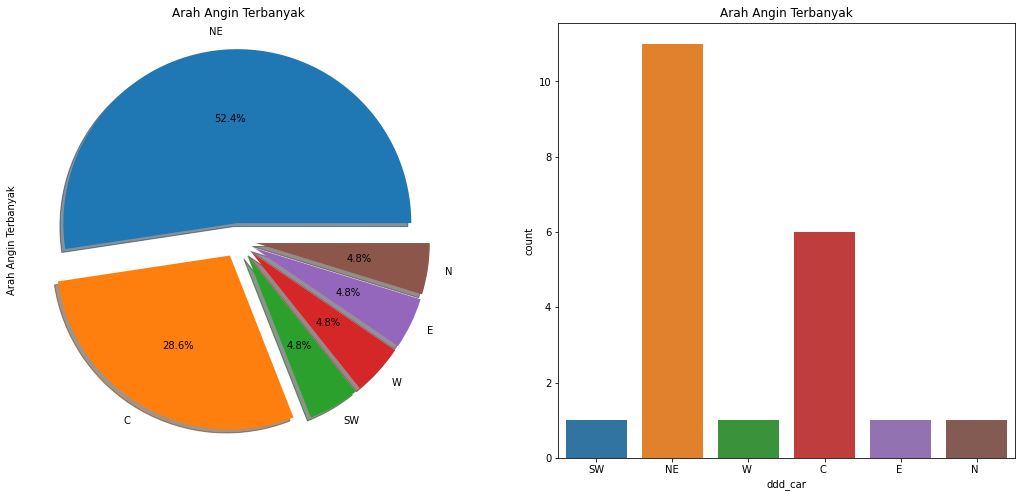

In [56]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['ddd_car'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Arah Angin Terbanyak')
ax[0].set_ylabel('Arah Angin Terbanyak')
sns.countplot('ddd_car',data=df,ax=ax[1])
ax[1].set_title('Arah Angin Terbanyak')

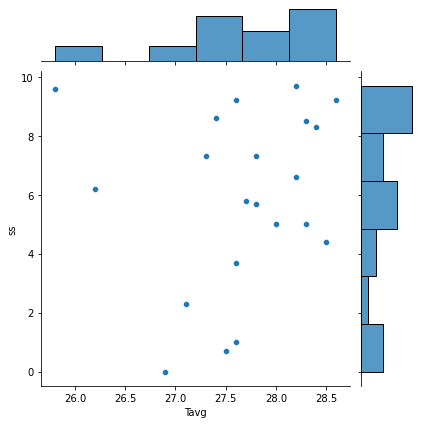

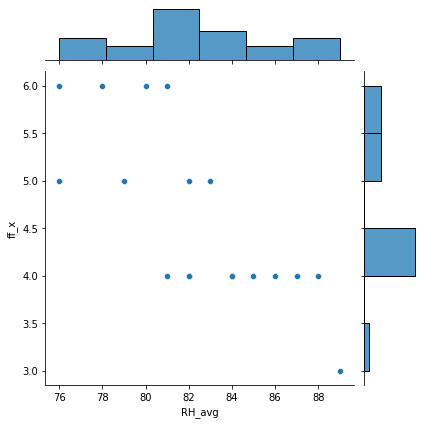

In [57]:
sns.jointplot(x='Tavg',y='ss',data=df)
sns.jointplot(x='RH_avg',y='ff_x',data=df)

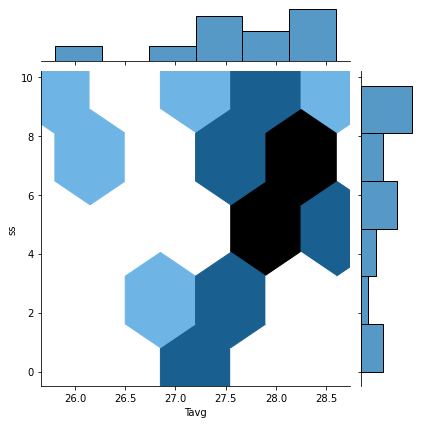

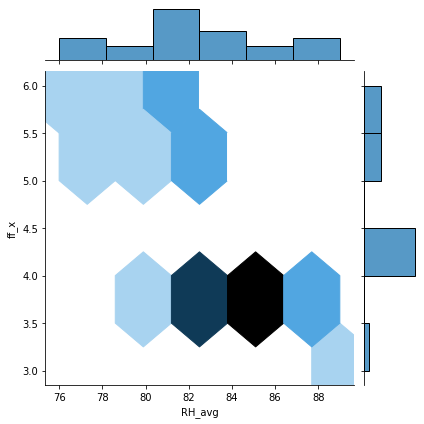

In [58]:
sns.jointplot('Tavg','ss',kind='hex',data=df)
sns.jointplot('RH_avg','ff_x',kind='hex',data=df)

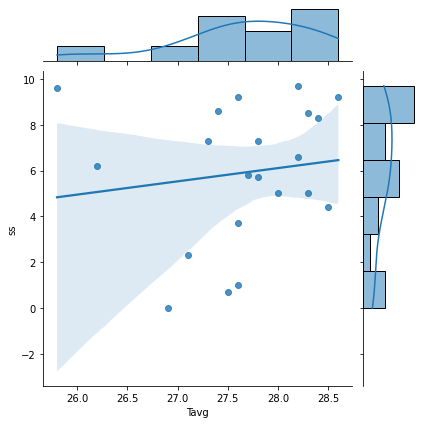

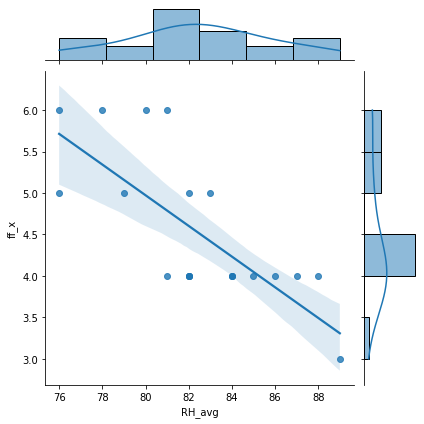

In [59]:
sns.jointplot('Tavg','ss', data=df, kind='reg')
sns.jointplot('RH_avg','ff_x', data=df, kind='reg')

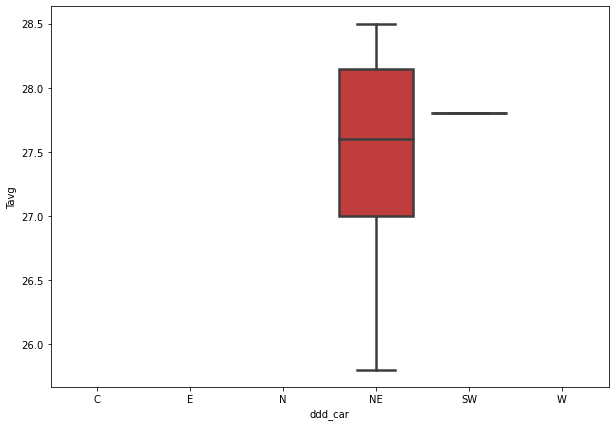

In [60]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='ddd_car',y='Tavg',
                data=df,order=['C','E','N','NE','SW','W'],linewidth=2.5,orient='v',dodge=False)

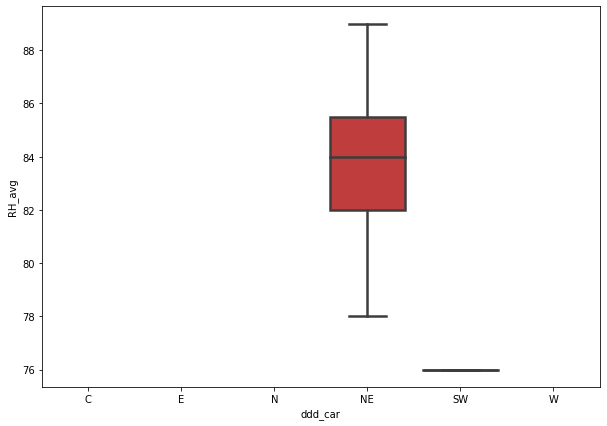

In [61]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='ddd_car',y='RH_avg',
                data=df,order=['C','E','N','NE','SW','W'],linewidth=2.5,orient='v',dodge=False)

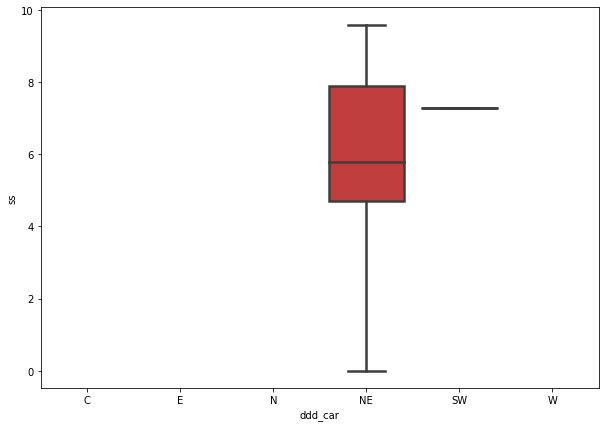

In [62]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='ddd_car',y='ss',
                data=df,order=['C','E','N','NE','SW','W'],linewidth=2.5,orient='v',dodge=False)

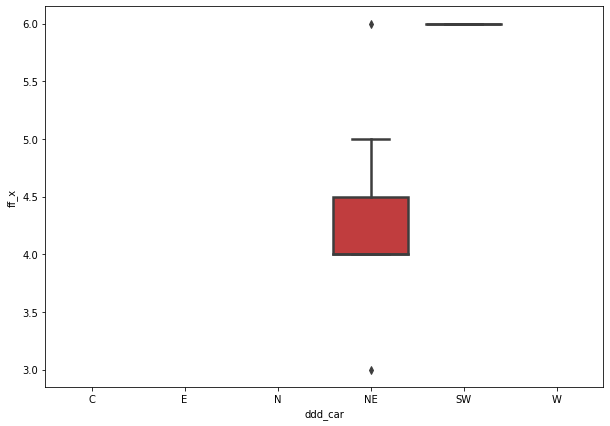

In [63]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='ddd_car',y='ff_x',
                data=df,order=['C','E','N','NE','SW','W'],linewidth=2.5,orient='v',dodge=False)

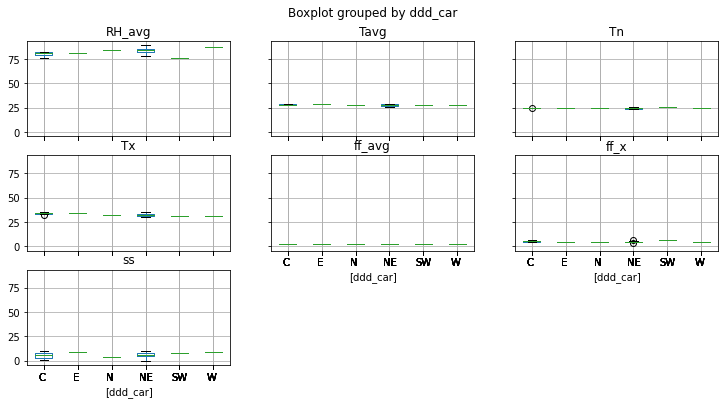

In [64]:
df.boxplot(by="ddd_car", figsize=(12, 6))
pass

<AxesSubplot:xlabel='ddd_car', ylabel='ss'>

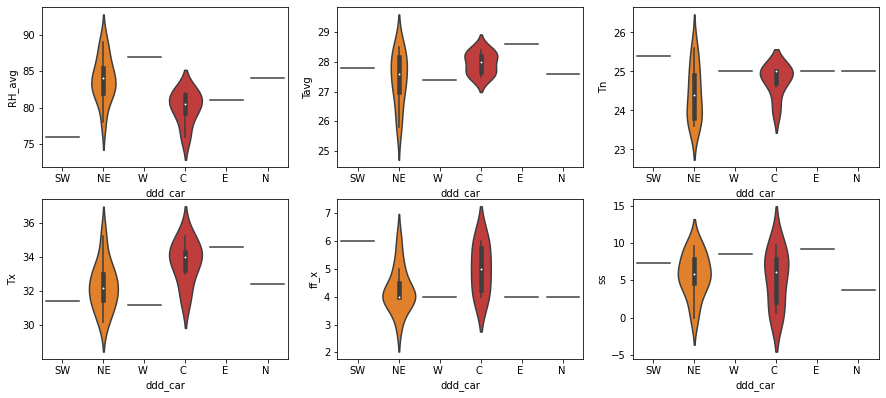

In [65]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.violinplot(x='ddd_car',y='RH_avg',data=df)
plt.subplot(3,3,2)
sns.violinplot(x='ddd_car',y='Tavg',data=df)
plt.subplot(3,3,3)
sns.violinplot(x='ddd_car',y='Tn',data=df)
plt.subplot(3,3,4)
sns.violinplot(x='ddd_car',y='Tx',data=df)
#plt.subplot(3,3,5)
#sns.violinplot(x='ddd_car',y='ff_avg',data=df) --> ff_avg tidak dilihat karena besar semua nilai adalah 2
plt.subplot(3,3,5)
sns.violinplot(x='ddd_car',y='ff_x',data=df)
plt.subplot(3,3,6)
sns.violinplot(x='ddd_car',y='ss',data=df)

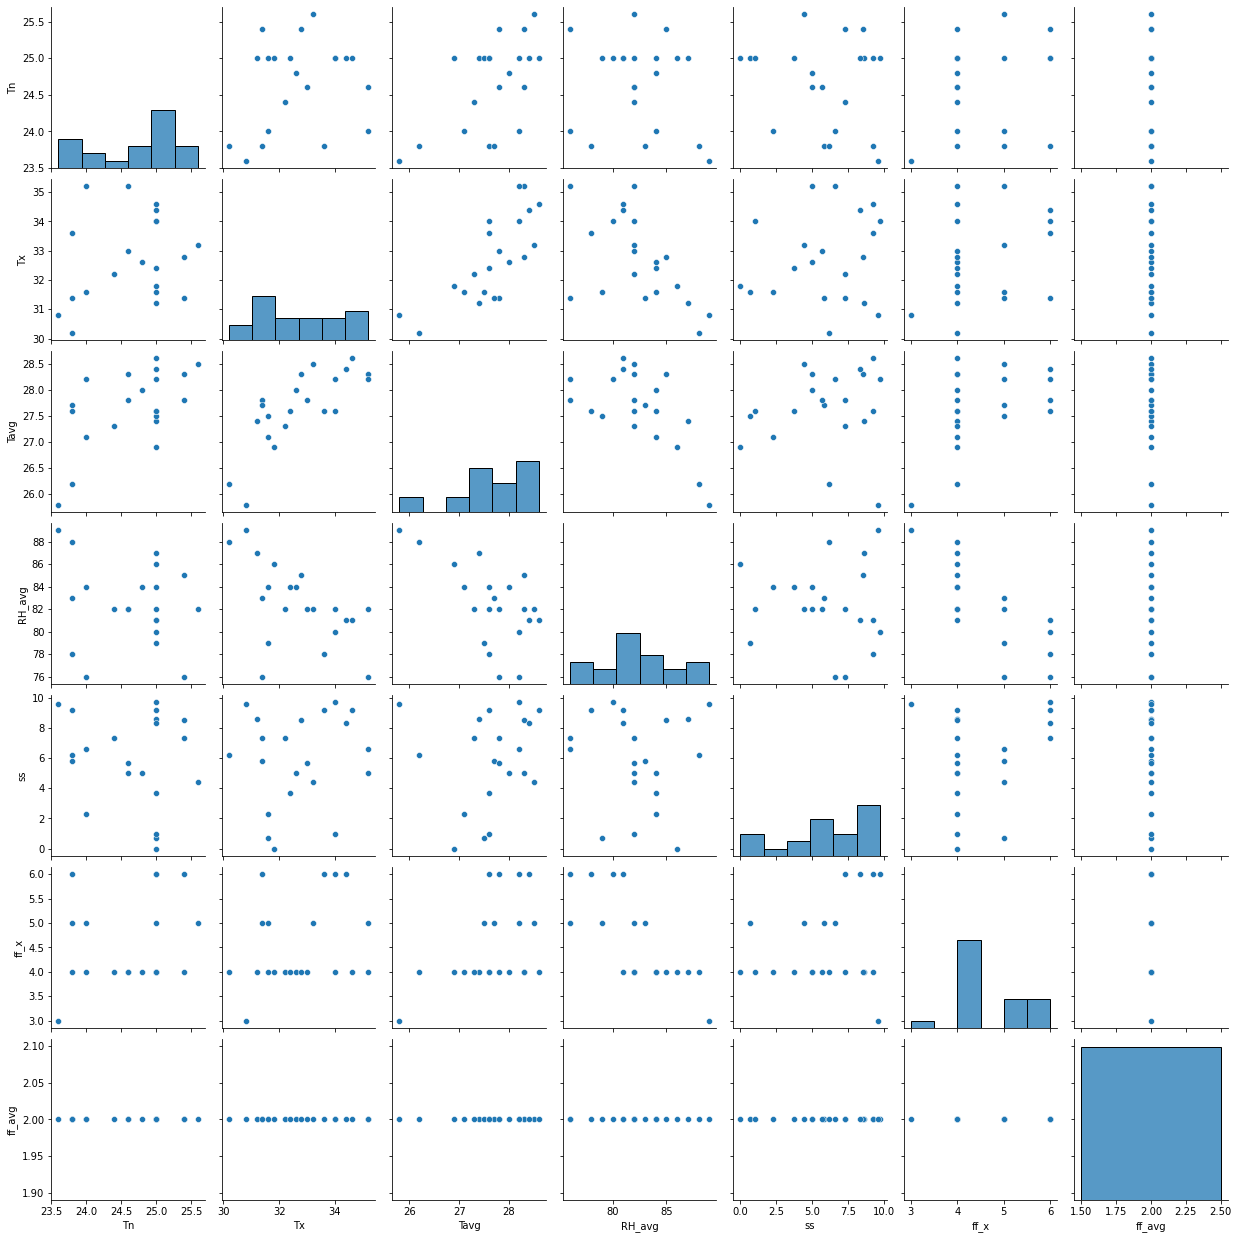

In [66]:
sns.pairplot(data=df,kind='scatter')

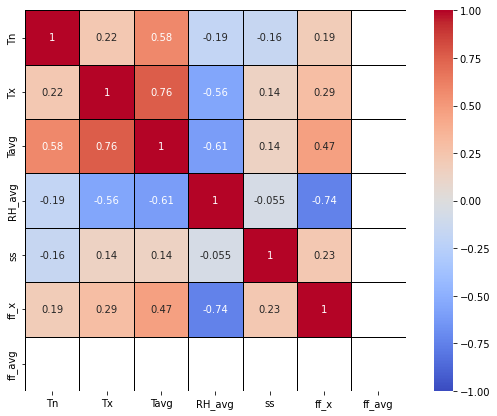

In [67]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',
                square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

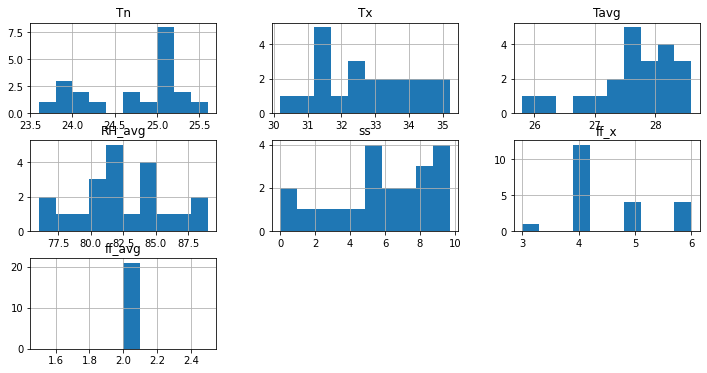

In [68]:
df.hist(linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

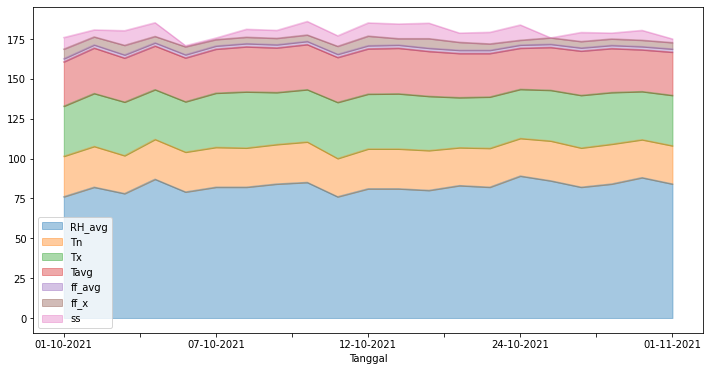

In [69]:
df.plot.area(y=['RH_avg','Tn','Tx','Tavg','ff_avg','ff_x','ss'],alpha=0.4,figsize=(12, 6));

# Tugas Akhir 4: Membangun Model

In [70]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report

# Import libarary confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split

# Import libarary Logistic Regression
from sklearn.linear_model import  LogisticRegression

from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

# Import libarary KNN
from sklearn.neighbors import KNeighborsClassifier

# Import libarary Support Vector Machines dan linier Support Vector Machines
from sklearn.svm import SVC, LinearSVC

# Import libarary Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [71]:
df

,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg,ddd_car
Tanggal,,,,,,,,
01-10-2021,25.4,31.4,27.8,76,7.3,6,2,SW
03-10-2021,25.6,33.2,28.5,82,4.4,5,2,NE
04-10-2021,23.8,33.6,27.6,78,9.2,6,2,NE
05-10-2021,25.0,31.2,27.4,87,8.6,4,2,W
06-10-2021,25.0,31.6,27.5,79,0.7,5,2,C
07-10-2021,25.0,34.0,27.6,82,1.0,4,2,C
08-10-2021,24.6,35.2,28.3,82,5.0,4,2,NE
09-10-2021,24.8,32.6,28.0,84,5.0,4,2,NE
10-10-2021,25.4,32.8,28.3,85,8.5,4,2,NE


In [72]:
X=df.iloc[:,1:6].values
y=df.iloc[:,7].values

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [95]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall = recall_score(y_test, Y_pred,average='micro')
f1 =f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[1 0 0]
 [1 0 0]
 [2 0 3]]
accuracy_KNN : 0.571
precision_KNN : 0.571
recall_KNN: 0.571
f1-score_KNN : 0.571


In [75]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test,Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 =f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[1 0 0]
 [0 0 1]
 [1 0 4]]
accuracy_Naive Bayes: 0.714
precision_Naive Bayes: 0.714
recall_Naive Bayes: 0.714
f1-score_Naive Bayes : 0.714


In [76]:
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

Confusion matrix for SVC
 [[0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 3 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]]
accuracy_SVC: 0.429
precision_SVC: 0.429
recall_SVC: 0.429
f1-score_SVC : 0.429


In [97]:
# Ringkasan akurasi dari beberapa model yang dibangun
results = pd.DataFrame({
    'Model': ['KNN', 
              'Naive Bayes',  
              ' Support Vector Machine'],
    
    'Score': [acc_knn,
              acc_gaussian,  
              acc_linear_svc],
    
    "Accuracy_score":[accuracy_knn,
                      accuracy_nb,
                      accuracy_svc
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head()

,Model,Score,Accuracy_score
0,Naive Bayes,85.71,71.43
1,KNN,50.00,57.14
2,Support Vector Machine,64.29,42.86


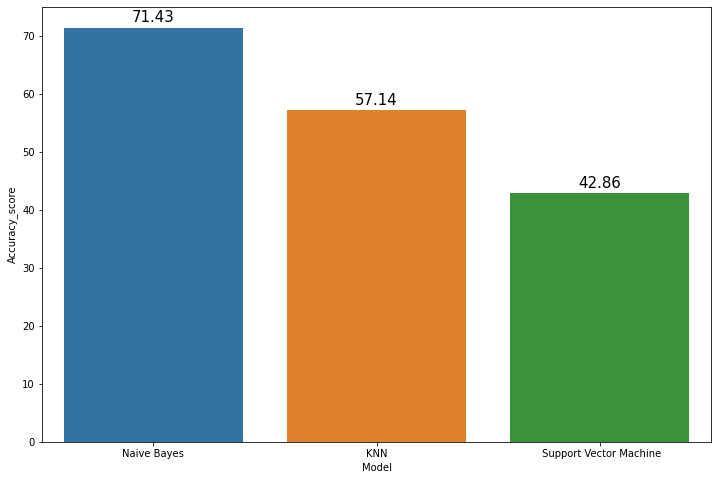

In [78]:
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')

Berdasarkan akurasi yang diperoleh model dengan algoritma naive bayes memberikan akurasi yang paling tinggi. Oleh karena itu model terbaik yang digunakan untuk mengklasifikasikan cuaca di Kabupaten Deli Serdang adalah model naive bayes dengan akurasi sebesar 71.43 persen. 


# BELUM DI RUN KARENA DI TEMPAT AKU NGGA BISA INSTALL IMBLEARN

In [81]:
#!pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.8.1-py3-none-any.whl (189 kB)


In [101]:
X_train

array([[32.4, 27.6, 84. ,  3.7,  4. ],
       [35.2, 28.3, 82. ,  5. ,  4. ],
       [30.2, 26.2, 88. ,  6.2,  4. ],
       [31.6, 27.5, 79. ,  0.7,  5. ],
       [33.6, 27.6, 78. ,  9.2,  6. ],
       [34. , 27.6, 82. ,  1. ,  4. ],
       [31.8, 26.9, 86. ,  0. ,  4. ],
       [35.2, 28.2, 76. ,  6.6,  5. ],
       [32.6, 28. , 84. ,  5. ,  4. ],
       [33. , 27.8, 82. ,  5.7,  4. ],
       [31.2, 27.4, 87. ,  8.6,  4. ],
       [31.4, 27.8, 76. ,  7.3,  6. ],
       [30.8, 25.8, 89. ,  9.6,  3. ],
       [34. , 28.2, 80. ,  9.7,  6. ]])

In [107]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 5, n_neighbors = 6

In [104]:
# Over sampling data dengan algoritma SMOTE
# import SMOTE module from imblearn library
#import imbalanced-learn as imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

AttributeError: 'SMOTE' object has no attribute 'fit_sample'

In [109]:
# Membangun model dengan data yang sudah di oversampling 
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

          C        0.50      1.00      0.67         1
          E        0.00      0.00      0.00         1
          NE       0.80      0.80      0.80         5

    accuracy                           0.71         7
   macro avg       0.43      0.60      0.49         7
weighted avg       0.64      0.71      0.67         7

